<a href="https://colab.research.google.com/github/VictorGuui/INPE/blob/master/Atividade4_6INPE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xarray as xr

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.5 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs

In [ ]:
import cartopy.feature as cfeature

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
import pandas as pd


In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
estados = gpd.read_file("/content/drive/MyDrive/BR_UF_2022.shx")

In [ ]:
dsetAnomalia = xr.open_dataset("/content/drive/MyDrive/Climatologia_AmericaDoSul_CHIRPS.nc")

In [ ]:
lat = dsetAnomalia.latitude.values
lon = dsetAnomalia.longitude.values
var = dsetAnomalia['precip']

- aqui eu pego as dimensões e coloca elas em variaveis

In [ ]:
dsetAnomalia

<xarray.Dataset>
Dimensions:    (time: 513, longitude: 1200, latitude: 1300)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-09-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.6
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    history:           Thu Dec 07 10:46:23 2023: cdo sellonlatbox,-90,-30,-60...
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

- Aqui eu demonstro o conteudo dentro arquivo "Climatologia_AmericaDoSul_CHIRPS.nc"

In [ ]:
precipitacao = dsetAnomalia['precip']

- Aqui eu estou passando a variavel precip para dentro da variavel precipitacao, assim facilitando quando eu for usar.

In [ ]:
precipitacao

<xarray.DataArray 'precip' (time: 513, latitude: 1300, longitude: 1200)>
[800280000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2023-09-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [ ]:
precipitacao = precipitacao.sel(time=slice('1991-01-01', '2020-12-01'))

In [ ]:
precipitacao

<xarray.DataArray 'precip' (time: 360, latitude: 1300, longitude: 1200)>
[561600000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

- Aqui eu fiz um recorte no periodo em que eu quero analisar que é de 1991 - 2020 para uso de comparação mais a frente

In [ ]:
media_climatologica = precipitacao.groupby('time.month').mean(dim='time')

 - Aqui eu realizo o calculo para média climatologica no periodo de 1991-2020 ja que eu fiz o recorte para o mesmo pperiodo na varial.
 - No entanto eu crio o média para ter a media climatologica



In [ ]:
media_climatologica

<xarray.DataArray 'precip' (month: 12, latitude: 1300, longitude: 1200)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [  9.430254 ,   9.405356 ,   8.0849905, ...,         nan,
                 nan,         nan],
        [ 10.933645 ,  10.96484  ,   9.633261 , ...,         nan,
                 nan,         nan],
        [ 11.447035 ,  11.389899 ,  11.267085 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [ 36.867603 ,  36.7379   ,  36.539143 , ...,         nan,
                 nan,         nan],
        [ 39.52608  ,  39.314552 ,  37.95986  , ...,         nan,
                 nan,         nan],
        [ 50.09324  ,  48.715473 ,  44.827175 , ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ 12.13097  ,  10.678166 ,  11.599448 , ...,         nan,
                 nan,         nan],
        [ 14.596174 ,  14.248384 ,  15.238247 , ...,         nan,
                 nan,         nan],
        [ 18.262096 ,  17.668884 ,  17.613802 , ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [ ]:
media_climatologica1 = precipitacao.groupby('time.year').mean(dim='time')

In [ ]:
media_climatologica1

#Teste para entender as possiveis probabilidades dos arquivos

<xarray.DataArray 'precip' (year: 30, latitude: 1300, longitude: 1200)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 71.322205,  70.42637 ,  69.901726, ...,        nan,
                nan,        nan],
        [ 74.89294 ,  76.71697 ,  75.72957 , ...,        nan,
                nan,        nan],
        [ 80.08503 ,  81.09368 ,  83.31428 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 94.148705,  92.822754,  91.978294, ...,        nan,
                nan,        nan],
        [102.03834 , 103.30207 , 100.32061 , ...,        nan,
                nan,        nan],
        [111.222176, 112.14642 , 109.192566, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [115.16868 , 113.765495, 113.171   , ...,        nan,
                nan,        nan],
        [125.644745, 127.32044 , 126.82542 , ...,        nan,
                nan,        nan],
        [140.15804 , 143.12141 , 141.0379  , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
  * year       (year) int64 1991 1992 1993 1994 1995 ... 2017 2018 2019 2020
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Essa media_climatologica1 eu criei apenas para o entendimento do pq o time.month recorta apenas 12 meses:
 - No entanto meu entendimento foi que ele cria esse valor dos 12 meses para ter o periodo estações "DJF","MAM","JJA","SON".

In [ ]:
media_climatologica2 = precipitacao.groupby('time.season').mean(dim='time')

In [ ]:
media_climatologica2

#Teste para entender as possiveis probabilidades dos arquivos

<xarray.DataArray 'precip' (season: 4, latitude: 1300, longitude: 1200)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [  9.734282,   9.598019,   9.458608, ...,        nan,
                nan,        nan],
        [ 11.486437,  11.750696,  11.619815, ...,        nan,
                nan,        nan],
        [ 12.554264,  12.353293,  12.672107, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 62.559303,  62.16078 ,  60.335693, ...,        nan,
                nan,        nan],
        [ 67.588234,  67.61286 ,  69.36096 , ...,        nan,
                nan,        nan],
        [ 69.291504,  66.9937  ,  69.39747 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [131.42906 , 128.73354 , 128.9036  , ...,        nan,
                nan,        nan],
        [139.65083 , 141.07307 , 139.6376  , ...,        nan,
                nan,        nan],
        [151.95345 , 157.74469 , 151.45221 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [ ]:
ano = 2022
mes = 1
anomalia_jan_2022 = var.sel(time=f'{ano}-{mes:02d}') - media_climatologica.sel(month=mes)

- Agora aqui eu passo alguns valores para as variveis ano = 2022 (que é o ano em que eu quero analisar a precipitação) e mes = 1 (que é o mes em que eu vou me basear para comparar com os demais meses).
- Assim eu posso ter a anomalia do mês de jan/2022

- Nesse trecho do código " media_climatologica.sel(month=mes) " podesse observar que ao usar o comando seu eu digo em qual mes eu gostaria de comparar com os demais e `month= mes` ele vai pegar o mes em que eu quero como exemplo que é o mês `1 - Janeiro`

In [ ]:
anomalia_jan_2022

<xarray.DataArray 'precip' (time: 1, latitude: 1300, longitude: 1200)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [ 5.0560217,  5.615137 ,  5.496127 , ...,        nan,
                nan,        nan],
        [ 7.3560658,  8.046303 ,  7.658283 , ...,        nan,
                nan,        nan],
        [ 9.001276 ,  9.71639  , 10.02291  , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
    month      int64 1

In [ ]:
anomalia_jan_2022 = anomalia_jan_2022.isel(time=0)

- **Erro Original:** O erro `TypeError: Input z must be 2D, not 3D` indicava que a função de plotagem que você estava usando esperava dados bidimensionais (2D), mas os dados tinham três dimensões (3D).

- **Solução Adotada:** Ao executar `anomalia_jan_2022.isel(time=0)`, reduzi a dimensão 'time' para apenas o primeiro ponto, convertendo os dados de 3D para 2D. Essa abordagem resolveu o erro, pois os dados agora atendem ao requisito de serem bidimensionais.

- GPT que me ajudou a entender isso.

In [ ]:
anomalia_jan_2022

<xarray.DataArray 'precip' (latitude: 1300, longitude: 1200)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [ 5.0560217,  5.615137 ,  5.496127 , ...,        nan,        nan,
               nan],
       [ 7.3560658,  8.046303 ,  7.658283 , ...,        nan,        nan,
               nan],
       [ 9.001276 ,  9.71639  , 10.02291  , ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2022-01-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
    month      int64 1

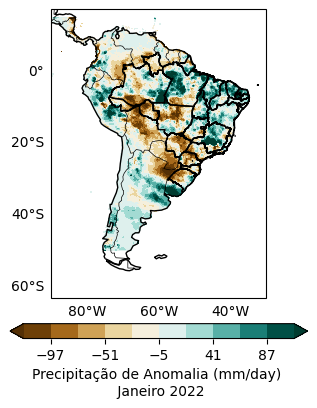

In [ ]:
# Configuração da projeção do mapa e sua extensão geográfica
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-90.0, -30.0, -60.0, 15.0))
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

# Configuração das grades do mapa
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.right_labels = False
gl.top_labels = False

# Define os níveis de contorno
levels = np.linspace(-120.0, 110.0, 11)

# Inicializa um gráfico de contorno preenchido com os dados de anomalia
cnplot = ax.contourf(anomalia_jan_2022.longitude, anomalia_jan_2022.latitude, anomalia_jan_2022, cmap='BrBG', levels=levels, extend='both')

# Adiciona uma barra de cores (colorbar) na parte inferior do gráfico
cbar = plt.colorbar(cnplot, orientation='horizontal', pad=0.07, shrink=0.6)
cbar.set_label('Precipitação de Anomalia (mm/day) \n Janeiro 2022')
estados.plot(ax=ax, color='none', edgecolor='black')

# Salva a figura em um arquivo chamado 'anomalia_jan_2022.png' com uma resolução de 300 dpi
plt.savefig('anomalia_jan_2022.png', dpi=300)

Criando o plot da anomalia de janeiro de 2022


In [ ]:
precipitacao = precipitacao.sel(time=slice('1998-01-01', '2022-12-01'))

In [ ]:
precipitacao['time.season']

<xarray.DataArray 'season' (time: 276)>
array(['DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM',
       'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON',
       'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-12-01

In [ ]:
precipitacao = precipitacao.sel(time=slice('1998-01-01', '2022-12-01'))


In [ ]:
precipitacao

<xarray.DataArray 'precip' (time: 300, latitude: 1300, longitude: 1200)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 7.824853,  7.893287, ...,       nan,       nan],
        [ 7.9429  , 12.225344, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [ 5.717   ,  6.114898, ...,       nan,       nan],
        [ 4.49017 ,  5.147418, ...,       nan,       nan]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [79.43086 , 79.47388 , ...,       nan,       nan],
        [92.22435 , 91.574554, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [21.455765, 21.54252 , ...,       nan,       nan],
        [28.78452 , 28.581131, ...,       nan,       nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2022-12-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [ ]:
sclim = precipitacao.groupby('time.season').mean('time')

O código acima calcula a média dos anmos desde 1998 até 2022

In [ ]:
sclim

<xarray.DataArray 'precip' (season: 4, latitude: 1300, longitude: 1200)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [  9.755958,   9.730206,   9.532041, ...,        nan,
                nan,        nan],
        [ 11.675711,  12.05009 ,  11.8684  , ...,        nan,
                nan,        nan],
        [ 13.032366,  12.885421,  13.258862, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [ 63.854713,  63.303673,  62.108852, ...,        nan,
                nan,        nan],
        [ 69.187645,  69.098656,  71.5501  , ...,        nan,
                nan,        nan],
        [ 71.728325,  69.446976,  72.27613 , ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [135.10242 , 132.60173 , 132.93639 , ...,        nan,
                nan,        nan],
        [143.73842 , 145.41568 , 144.12541 , ...,        nan,
                nan,        nan],
        [156.73807 , 162.66695 , 155.95232 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

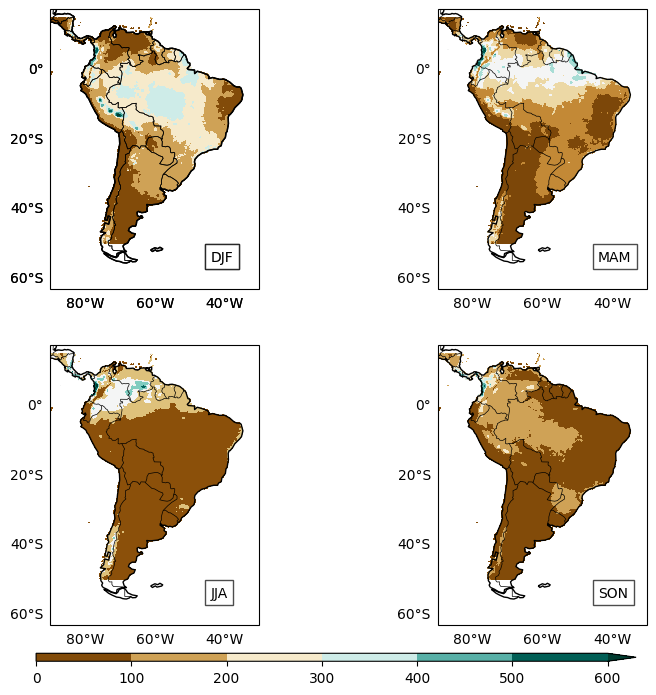

In [ ]:
def create_plot(ax, nrow, ncol, data, tlon, season=''):
    ax.set_extent((-90.0, -30.0, -60.0, 15.0))
    ax.coastlines(resolution='110m', color='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.ylines = False
    gl.right_labels = False
    gl.top_labels = False

    levels = np.linspace(0.0, 450.0, 11)
    cnplot = ax.contourf(data.longitude, data.latitude, data.sel(season=season), cmap='BrBG', extend='max')
    ax.text(tlon, -55, season, bbox=dict(facecolor='white', alpha=0.7))

    return cnplot

# Cria uma figura e uma grade de subplots
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2, hspace=0.2, wspace=0.00)

# Define as estações que deseja plotar
seasons = ['DJF', 'MAM', 'JJA', 'SON']

# Cria e plota os subplots para cada estação
for i, season in enumerate(seasons):
    row = i // 2
    col = i % 2
    create_plot(plt.subplot(gs[row, col], projection=ccrs.PlateCarree()), row, col, sclim, -44, season)

# Adiciona uma barra de cores
cax = plt.axes([0.2, 0.065, 0.6, 0.01])
cbar = plt.colorbar(create_plot(plt.subplot(gs[0, 0], projection=ccrs.PlateCarree()), 0, 0, sclim, -44, 'DJF'), cax=cax, orientation='horizontal', pad=0.4)

# Salva a figura e a exibe
# plt.savefig('s2-CHIRPS.png', dpi=300)
plt.show()

NameError: ignored

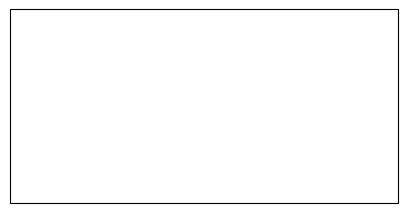

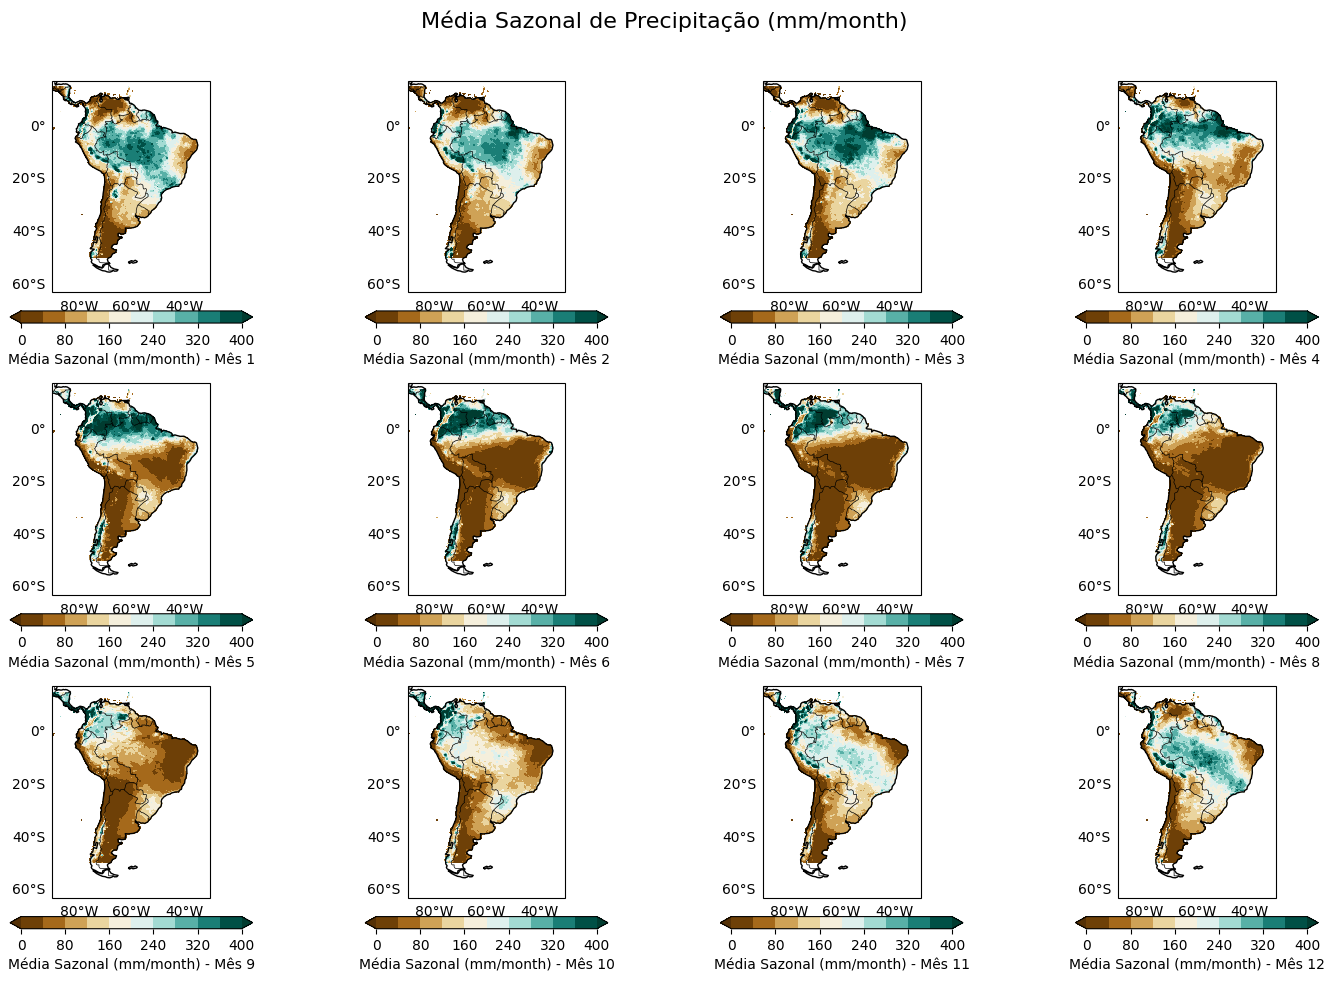

In [ ]:
# Configuração da projeção do mapa e sua extensão geográfica
fig, axs = plt.subplots(3, 4, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Média Sazonal de Precipitação (mm/month)', fontsize=16)

# Define os níveis de contorno
levels = np.linspace(0.0, 400.0, 11)

for i, ax in enumerate(axs.flatten(), start=1):
    # Calcula a média sazonal para o mês i
    media_mensal = media_climatologica.sel(month=i)

    # Inicializa um gráfico de contorno preenchido com os dados de média sazonal
    cnplot = ax.contourf(media_mensal.longitude, media_mensal.latitude, media_mensal, cmap='BrBG', levels=levels, extend='both')

    # Adiciona uma barra de cores (colorbar)
    cbar = plt.colorbar(cnplot, ax=ax, orientation='horizontal', pad=0.07, shrink=0.6)
    cbar.set_label(f'Média Sazonal (mm/month) - Mês {i}')

    # Adiciona limites do mapa e outras características
    ax.set_extent((-90.0, -30.0, -60.0, 15.0))
    ax.coastlines(resolution='110m', color='black')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

    # Configuração das grades do mapa
    gl = ax.gridlines(draw_labels=True)
    gl.xlines = False
    gl.ylines = False
    gl.right_labels = False
    gl.top_labels = False

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
ano = 2022
anomalias = var.sel(time=slice(f'{ano}-01', f'{ano}-12')) - media_climatologica